In [1]:
import re
import pandas as pd

In [2]:
file = open('WhatsApp Chat with APCC CMSA SEM-VI 2022.txt','r',encoding='utf-8')
data = file.read()

In [3]:
pattern = "\d{1,2}/\d{1,2}/\d{1,2},\s\d+:\d\d\s\w+\s-"

In [4]:
messages = re.split(pattern,data)[1:]

In [5]:
dates = re.findall(pattern,data)

In [6]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %I:%M %p -')
df.rename(columns={'message_date': 'date'}, inplace=True)

In [7]:
df

,user_message,date
0,"+91 90888 31306 created group ""CMSA SEM-1 APC...",2019-08-13 18:23:00
1,You were added\n,2019-08-13 18:23:00
2,+91 84201 18650 left\n,2019-08-25 13:51:00
3,ps sir apc: Tomorrow SDG mam will take your c...,2019-08-27 21:00:00
4,ps sir apc added +91 82768 00173\n,2019-08-27 21:00:00
...,...,...
4405,pb mam apc: Some students of our college had ...,2022-09-01 09:12:00
4406,pb mam apc: Those who have already applied fo...,2022-09-01 09:17:00
4407,kunal sir apc: Some students of our college h...,2022-09-03 19:35:00
4408,kunal sir apc: Oh repeated post...\n,2022-09-03 19:35:00


In [8]:
users = []
only_messagese = []
count = 0
for message in df['user_message']:
    temp = message.split(":")      
    if len(temp) == 1:
        users.append('group_notification')
        only_messagese.append(temp[0])
    else:
        users.append(temp[0])
        only_messagese.append(" ".join(temp[1:]))
    count += 1

df['user'] = users
df['only_message'] = only_messagese
df.drop(columns=['user_message'], inplace=True)

In [9]:
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [10]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))
df['period'] = period

In [11]:
num_url_messages = 0
for i in df['only_message']:
    if "<Media omitted>\n" in i:
        num_url_messages += 1
num_url_messages

370

In [12]:
x = df['user'].value_counts().head(10)

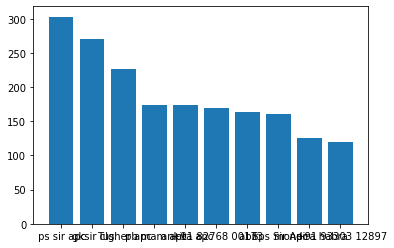

In [13]:
import matplotlib.pyplot as plt
name = x.index
count = x.values
plt.bar(name,count)
plt.show()

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127312 (\N{NEGATIVE CIRCLED LATIN CAPITAL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127329 (\N{NEGATIVE CIRCLED LATIN CAPITAL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127325 (\N{NEGATIVE CIRCLED LATIN CAPITAL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127313 (\N{NEGATIVE CIRCLED LATIN CAPITAL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


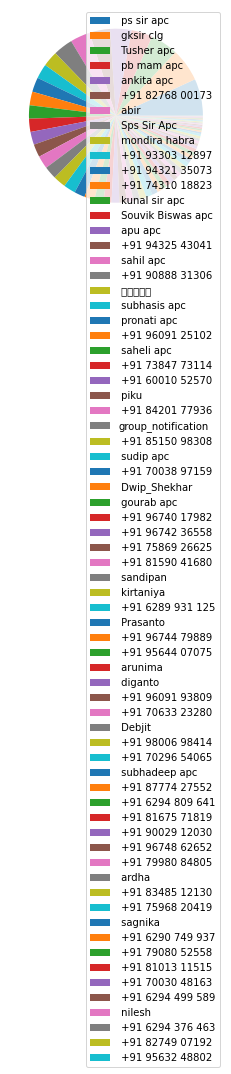

In [14]:
x = round((df['user'].value_counts()/df.shape[0])*100,2)
y = x.values
mylabels = x.index

plt.pie(y)
plt.legend(mylabels)
plt.show() 

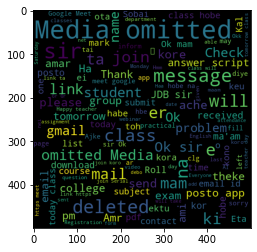

In [15]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500, min_font_size = 10,background_color="black")
df_wc = wc.generate(df['only_message'].str.cat(sep=" "))
plt.imshow(df_wc)

In [16]:
df = df[df['only_message']!= '<Media omitted>\n']
words = []
for message in df['only_message']:
    words.extend(message.split())
words    

['+91',
 '90888',
 '31306',
 'created',
 'group',
 '"CMSA',
 'SEM-1',
 'APC',
 '(OFFICIAL)"',
 'You',
 'were',
 'added',
 '+91',
 '84201',
 '18650',
 'left',
 'Tomorrow',
 'SDG',
 'mam',
 'will',
 'take',
 'your',
 'class',
 'from',
 '11am',
 'instead',
 'of',
 '10am',
 'ps',
 'sir',
 'apc',
 'added',
 '+91',
 '82768',
 '00173',
 'Ok',
 'sir',
 'All',
 'the',
 'students',
 'are',
 'hereby',
 'informed',
 'that',
 'they',
 'have',
 'to',
 'write',
 'down',
 'their',
 'Names',
 'and',
 'roll',
 'number',
 'along',
 'with',
 'phone',
 'number',
 'and',
 'email',
 'id',
 'in',
 'this',
 'group',
 'by',
 'Saturday',
 '*Format',
 '*',
 'Name<space>Roll',
 'number<space>Email',
 'Id',
 '<space>',
 'phone',
 'number',
 'Why',
 'Name',
 'Sudipa',
 'biswas',
 ',',
 'Roll',
 'number',
 '190469',
 ',',
 'Email',
 'id',
 'sudipapiku@gmail.com',
 ',',
 'Phone',
 'number',
 '7029779167',
 'Md',
 'Ibrahim',
 '190412',
 'sidthebadboy.mi@gmail.com',
 'This',
 'message',
 'was',
 'deleted',
 'Dwip',
 'Sh

([<matplotlib.patches.Wedge at 0x7f0bc0136a10>,
 [Text(1.0049929458536386, 0.44720149684949123, 'the'),
  Text(0.350335343944952, 1.0427200711518756, 'to'),
  Text(-0.49775967333645094, 0.9809359345033649, '<Media'),
  Text(-1.039772426146353, 0.3589892781487035, 'omitted>'),
  Text(-1.0021858905281542, -0.4534572094765842, 'class'),
  Text(-0.5119736952261679, -0.9735927975270068, 'sir'),
  Text(0.03884628089069612, -1.0993138616705247, 'of'),
  Text(0.5129848900557521, -0.9730603797167411, 'Ok'),
  Text(0.8775353202866167, -0.6632735194845827, 'and'),
  Text(1.0749057099043555, -0.23361873815046114, 'Sir')])

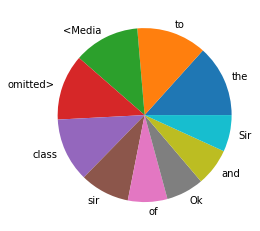

In [17]:
from collections import Counter
temp = Counter(words).most_common(10)
x = []
y = []
for i in temp:
    x.append(i[0])
    y.append(i[1])
plt.pie(y,labels=x)
    

([<matplotlib.patches.Wedge at 0x7f0bbabdf310>,
 [Text(0.8834001060480474, 0.6554420284314234, '🙏'),
  Text(-0.3057001669438905, 1.0566680689461936, '🙂'),
  Text(-1.058560524983718, 0.29908128484777446, '📧'),
  Text(-0.9841374764030378, -0.4913994582201536, '😑'),
  Text(-0.5340261878302832, -0.961673557248745, '🙄'),
  Text(0.006884077717900352, -1.0999784586408836, '🏻'),
  Text(0.43521962995207086, -1.010239513038558, '🤣'),
  Text(0.7753799329815988, -0.7802473707289578, '👉'),
  Text(0.9961290048102581, -0.46661226492209223, '😂'),
  Text(1.089590902561296, -0.15096908642387796, '😒')])

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128231 (\N{E-MAIL SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:15

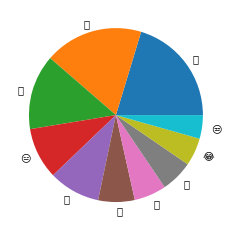

In [25]:
import emoji
emojis = []
for message in df['only_message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
temp = Counter(emojis).most_common(10)
x = []
y = []
for i in temp:
    x.append(i[0])
    y.append(i[1])
plt.pie(y,labels=x)

In [26]:
df

,date,user,only_message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2019-08-13 18:23:00,group_notification,"+91 90888 31306 created group ""CMSA SEM-1 APC...",2019-08-13,2019,8,August,13,Tuesday,18,23,18-19
1,2019-08-13 18:23:00,group_notification,You were added\n,2019-08-13,2019,8,August,13,Tuesday,18,23,18-19
2,2019-08-25 13:51:00,group_notification,+91 84201 18650 left\n,2019-08-25,2019,8,August,25,Sunday,13,51,13-14
3,2019-08-27 21:00:00,ps sir apc,Tomorrow SDG mam will take your class from 11...,2019-08-27,2019,8,August,27,Tuesday,21,0,21-22
4,2019-08-27 21:00:00,group_notification,ps sir apc added +91 82768 00173\n,2019-08-27,2019,8,August,27,Tuesday,21,0,21-22
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,2022-09-01 09:12:00,pb mam apc,Some students of our college had applied for ...,2022-09-01,2022,9,September,1,Thursday,9,12,9-10
4406,2022-09-01 09:17:00,pb mam apc,Those who have already applied for PG admissi...,2022-09-01,2022,9,September,1,Thursday,9,17,9-10
4407,2022-09-03 19:35:00,kunal sir apc,Some students of our college had applied for ...,2022-09-03,2022,9,September,3,Saturday,19,35,19-20
4408,2022-09-03 19:35:00,kunal sir apc,Oh repeated post...\n,2022-09-03,2022,9,September,3,Saturday,19,35,19-20


In [30]:
timeline = df.groupby(['year','month_num','month']).count()['only_message'].reset_index()
timeline    

,year,month_num,month,only_message
0,2019,8,August,62
1,2019,9,September,148
2,2019,10,October,6
3,2019,11,November,129
4,2019,12,December,61
5,2020,1,January,114
6,2020,2,February,153
7,2020,3,March,68
8,2020,4,April,557
9,2020,5,May,182


In [34]:
timeline['time'] = timeline["month"]+ "-" + timeline["year"].map(str)
timeline

,year,month_num,month,only_message,time
0,2019,8,August,62,August-2019
1,2019,9,September,148,September-2019
2,2019,10,October,6,October-2019
3,2019,11,November,129,November-2019
4,2019,12,December,61,December-2019
5,2020,1,January,114,January-2020
6,2020,2,February,153,February-2020
7,2020,3,March,68,March-2020
8,2020,4,April,557,April-2020
9,2020,5,May,182,May-2020


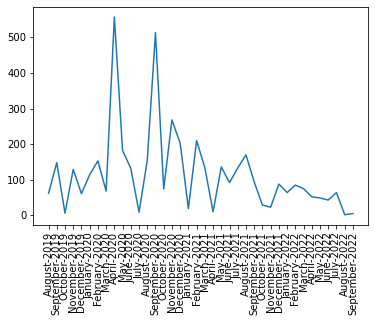

In [36]:
plt.plot(timeline['time'],timeline['only_message'])
plt.xticks(rotation='vertical')
plt.show()

In [37]:
daily_timeline = df.groupby('only_date').count()['only_message'].reset_index()
daily_timeline

,only_date,only_message
0,2019-08-13,2
1,2019-08-25,1
2,2019-08-27,3
3,2019-08-29,52
4,2019-08-30,4
...,...,...
531,2022-08-14,1
532,2022-08-17,1
533,2022-09-01,2
534,2022-09-03,2


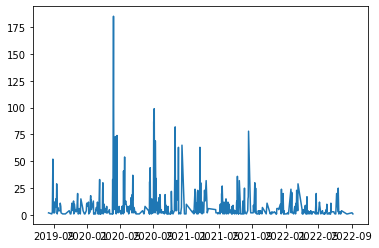

In [40]:
plt.plot(daily_timeline['only_date'],daily_timeline['only_message'])

In [44]:
week_timeline = df['day_name'].value_counts()
week_timeline

Wednesday    891
Thursday     889
Tuesday      750
Saturday     625
Friday       543
Monday       498
Sunday       214
Name: day_name, dtype: int64

<BarContainer object of 7 artists>

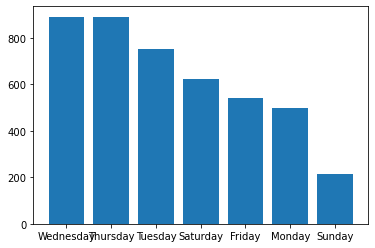

In [47]:
plt.bar(week_timeline.index,week_timeline.values)

In [72]:
f = df['period'].value_counts()
f = dict(f)
type(f)
f

{'13-14': 512,
 '11-12': 405,
 '12-13': 395,
 '14-15': 348,
 '10-11': 295,
 '21-22': 293,
 '22-23': 291,
 '15-16': 278,
 '20-21': 251,
 '16-17': 217,
 '17-18': 205,
 '18-19': 199,
 '19-20': 174,
 '23-00': 166,
 '9-10': 152,
 '8-9': 99,
 '00-1': 55,
 '7-8': 26,
 '1-2': 23,
 '6-7': 9,
 '5-6': 7,
 '4-5': 5,
 '3-4': 3,
 '2-3': 2}

<BarContainer object of 24 artists>

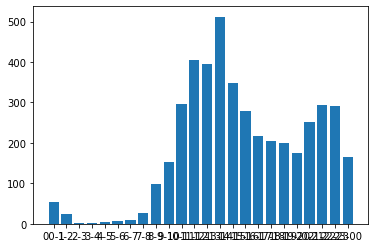

In [76]:
temp = sorted(f.keys(),key = lambda x:int(x[:x.index('-')]))
final = {}
for i in temp:
    final[i] = f[i]
final
plt.bar(final.keys(),final.values())

<BarContainer object of 10 artists>

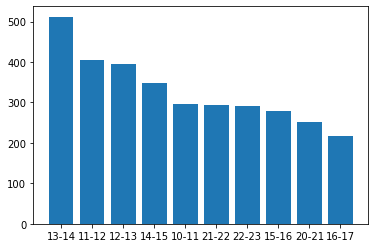

In [53]:
plt.bar(f.index,f.values)